# Bank Loan Default Prediction (India)

**Ishak Islam** | UMID28072552431 | Unified Mentor Internship

---

This notebook analyzes bank loan default patterns using borrower data. The analysis examines demographic, financial, and loan characteristics to identify factors that contribute to loan defaults.

## 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Define paths
DATA_DIR = Path('../data')
VIZ_DIR = Path('../visualizations')
TABLEAU_DIR = Path('../tableau')

VIZ_DIR.mkdir(exist_ok=True)
TABLEAU_DIR.mkdir(exist_ok=True)

# Color palette
COLORS = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22', '#34495e']

print('Setup complete!')

Setup complete!


## 2. Load Data

**Dataset Source:** https://www.kaggle.com/datasets/yasserh/loan-default-dataset

Download the dataset and place `Loan_Default.csv` in the `data/` folder.

In [2]:
# Load loan data
try:
    df = pd.read_csv(DATA_DIR / 'Loan_Default.csv')
    print(f'Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns')
except FileNotFoundError:
    print('File not found: Loan_Default.csv')
    print('Please download from: https://www.kaggle.com/datasets/yasserh/loan-default-dataset')
    df = None

Dataset loaded: 148,670 rows, 34 columns


## 3. Data Exploration

In [3]:
# Preview the data
if df is not None:
    print('First 10 rows:')
    display(df.head(10))

First 10 rows:


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [4]:
# Check column names and data types
if df is not None:
    print('Columns and Data Types:')
    print('-' * 50)
    for col in df.columns:
        print(f'{col}: {df[col].dtype}')

Columns and Data Types:
--------------------------------------------------
ID: int64
year: int64
loan_limit: str
Gender: str
approv_in_adv: str
loan_type: str
loan_purpose: str
Credit_Worthiness: str
open_credit: str
business_or_commercial: str
loan_amount: int64
rate_of_interest: float64
Interest_rate_spread: float64
Upfront_charges: float64
term: float64
Neg_ammortization: str
interest_only: str
lump_sum_payment: str
property_value: float64
construction_type: str
occupancy_type: str
Secured_by: str
total_units: str
income: float64
credit_type: str
Credit_Score: int64
co-applicant_credit_type: str
age: str
submission_of_application: str
LTV: float64
Region: str
Security_Type: str
Status: int64
dtir1: float64


In [5]:
# Basic statistics
if df is not None:
    print('Dataset Summary:')
    print('-' * 50)
    print(f'Total records: {len(df):,}')
    print(f'Total columns: {len(df.columns)}')
    print(f'\nMissing values per column:')
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    for col in df.columns:
        if missing[col] > 0:
            print(f'  {col}: {missing[col]:,} ({missing_pct[col]}%)')

Dataset Summary:
--------------------------------------------------
Total records: 148,670
Total columns: 34

Missing values per column:
  loan_limit: 3,344 (2.25%)
  approv_in_adv: 908 (0.61%)
  loan_purpose: 134 (0.09%)
  rate_of_interest: 36,439 (24.51%)
  Interest_rate_spread: 36,639 (24.64%)
  Upfront_charges: 39,642 (26.66%)
  term: 41 (0.03%)
  Neg_ammortization: 121 (0.08%)
  property_value: 15,098 (10.16%)
  income: 9,150 (6.15%)
  age: 200 (0.13%)
  submission_of_application: 200 (0.13%)
  LTV: 15,098 (10.16%)
  dtir1: 24,121 (16.22%)


In [6]:
# Numerical summary
if df is not None:
    print('Numerical Features Summary:')
    display(df.describe())

Numerical Features Summary:


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


## 4. Data Cleaning

In [7]:
def clean_loan_data(data):
    """Clean and prepare loan data."""
    df_clean = data.copy()
    
    # Handle missing values in numeric columns
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
    # Handle missing values in categorical columns
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna('Unknown')
    
    return df_clean

if df is not None:
    df_clean = clean_loan_data(df)
    print(f'Cleaned data: {len(df_clean):,} rows')
    print(f'Remaining missing values: {df_clean.isnull().sum().sum()}')

Cleaned data: 148,670 rows
Remaining missing values: 0


In [8]:
# Identify key columns
if df_clean is not None:
    print('Identifying key columns...')
    print('-' * 50)
    
    # Find target column (Status/Default)
    target_candidates = ['Status', 'Default', 'default', 'loan_status', 'TARGET']
    target_col = None
    for col in target_candidates:
        if col in df_clean.columns:
            target_col = col
            break
    print(f'Target column: {target_col}')
    
    # Find income column
    income_col = None
    for col in df_clean.columns:
        if 'income' in col.lower():
            income_col = col
            break
    print(f'Income column: {income_col}')
    
    # Find loan amount column
    loan_col = None
    for col in df_clean.columns:
        if 'loan' in col.lower() and ('amount' in col.lower() or 'amt' in col.lower()):
            loan_col = col
            break
    print(f'Loan amount column: {loan_col}')
    
    # Find age column
    age_col = None
    for col in df_clean.columns:
        if 'age' in col.lower():
            age_col = col
            break
    print(f'Age column: {age_col}')

Identifying key columns...
--------------------------------------------------
Target column: Status
Income column: income
Loan amount column: loan_amount
Age column: age


In [9]:
# Create derived features
if df_clean is not None and age_col:
    # The age column is categorical (e.g., '25-34', '35-44', '<25', '>74', 'Unknown')
    # Map to cleaner labels and filter out Unknown
    age_mapping = {
        '<25': '18-24',
        '25-34': '25-34',
        '35-44': '35-44',
        '45-54': '45-54',
        '55-64': '55-64',
        '65-74': '65-74',
        '>74': '75+',
        'Unknown': None  # Will be filtered out
    }
    
    df_clean['Age_Group'] = df_clean[age_col].map(age_mapping)
    
    # Show original distribution
    print('Original age distribution:')
    print(df[age_col].value_counts())
    print(f'\nUnknown values: {(df[age_col] == "Unknown").sum():,}')
    
    # Filter out Unknown for age analysis
    print('\nAge groups after mapping (excluding Unknown):')
    print(df_clean['Age_Group'].value_counts().sort_index())

Original age distribution:
age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64

Unknown values: 0

Age groups after mapping (excluding Unknown):
Age_Group
18-24     1337
25-34    19142
35-44    32818
45-54    34720
55-64    32534
65-74    20744
75+       7175
Name: count, dtype: int64


In [10]:
# Create income groups
if df_clean is not None and income_col:
    percentiles = df_clean[income_col].quantile([0.25, 0.5, 0.75])
    
    def categorize_income(x):
        if x <= percentiles[0.25]:
            return 'Low'
        elif x <= percentiles[0.5]:
            return 'Medium-Low'
        elif x <= percentiles[0.75]:
            return 'Medium-High'
        else:
            return 'High'
    
    df_clean['Income_Group'] = df_clean[income_col].apply(categorize_income)
    print('Income groups created:')
    print(df_clean['Income_Group'].value_counts())

Income groups created:
Income_Group
Medium-Low     42393
Low            37385
High           36824
Medium-High    32068
Name: count, dtype: int64


## 5. Default Rate Analysis

In [11]:
# Overall default statistics
if df_clean is not None and target_col:
    total_loans = len(df_clean)
    defaults = df_clean[target_col].sum()
    default_rate = (defaults / total_loans) * 100
    
    print('Loan Default Statistics')
    print('=' * 50)
    print(f'Total loans: {total_loans:,}')
    print(f'Defaulted loans: {defaults:,}')
    print(f'Non-defaulted loans: {total_loans - defaults:,}')
    print(f'Default rate: {default_rate:.2f}%')

Loan Default Statistics
Total loans: 148,670
Defaulted loans: 36,639
Non-defaulted loans: 112,031
Default rate: 24.64%


In [12]:
# Default rate by income group
if df_clean is not None and target_col and 'Income_Group' in df_clean.columns:
    print('Default Rate by Income Group')
    print('-' * 50)
    
    income_order = ['Low', 'Medium-Low', 'Medium-High', 'High']
    for group in income_order:
        if group in df_clean['Income_Group'].values:
            group_data = df_clean[df_clean['Income_Group'] == group]
            rate = group_data[target_col].mean() * 100
            count = len(group_data)
            print(f'{group}: {rate:.2f}% ({count:,} loans)')

Default Rate by Income Group
--------------------------------------------------
Low: 35.09% (37,385 loans)
Medium-Low: 21.99% (42,393 loans)
Medium-High: 21.15% (32,068 loans)
High: 20.14% (36,824 loans)


In [13]:
# Default rate by age group (excluding Unknown)
if df_clean is not None and target_col and 'Age_Group' in df_clean.columns:
    print('Default Rate by Age Group (excluding Unknown)')
    print('-' * 50)
    
    # Define the order for age groups
    age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
    
    for group in age_order:
        group_data = df_clean[df_clean['Age_Group'] == group]
        if len(group_data) > 0:
            rate = group_data[target_col].mean() * 100
            count = len(group_data)
            print(f'{group}: {rate:.2f}% ({count:,} loans)')

Default Rate by Age Group (excluding Unknown)
--------------------------------------------------
18-24: 28.95% (1,337 loans)
25-34: 22.19% (19,142 loans)
35-44: 22.27% (32,818 loans)
45-54: 24.05% (34,720 loans)
55-64: 25.89% (32,534 loans)
65-74: 26.86% (20,744 loans)
75+: 30.01% (7,175 loans)


## 6. Visualizations

### 6.1 Default Distribution

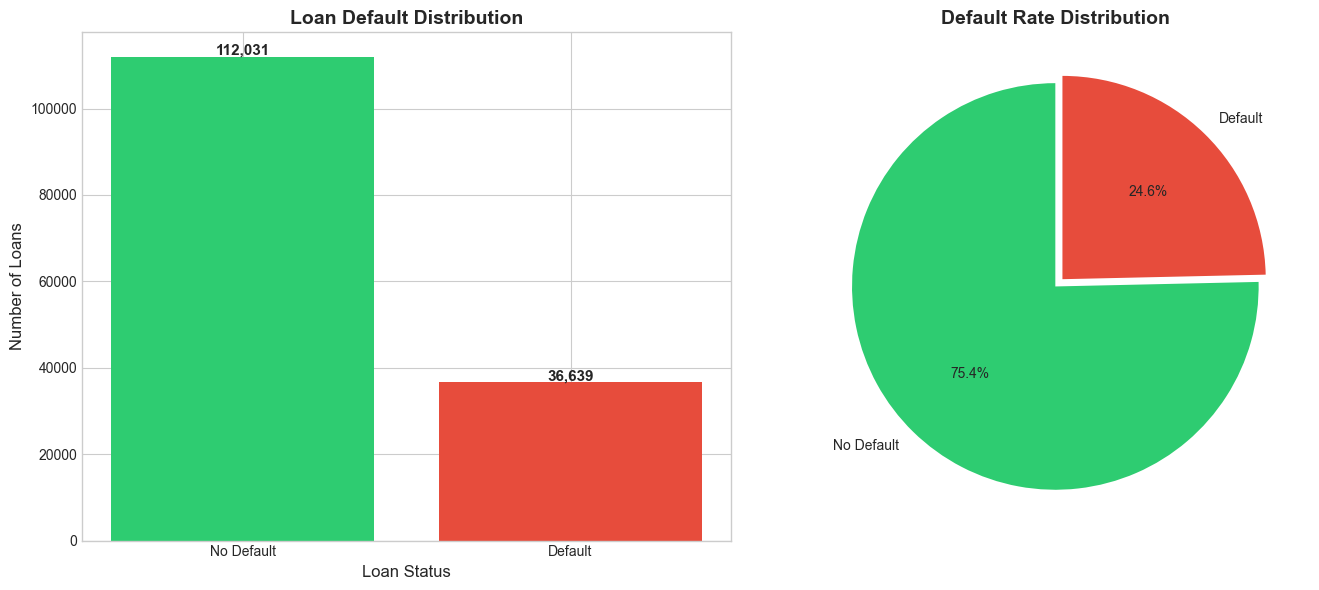

In [14]:
# Default distribution
if df_clean is not None and target_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    counts = df_clean[target_col].value_counts()
    labels = ['No Default', 'Default']
    colors = [COLORS[2], COLORS[1]]
    
    # Bar chart
    axes[0].bar(labels, counts.values, color=colors)
    axes[0].set_xlabel('Loan Status', fontsize=12)
    axes[0].set_ylabel('Number of Loans', fontsize=12)
    axes[0].set_title('Loan Default Distribution', fontsize=14, fontweight='bold')
    
    for i, v in enumerate(counts.values):
        axes[0].text(i, v + 500, f'{v:,}', ha='center', fontsize=11, fontweight='bold')
    
    # Pie chart
    axes[1].pie(counts.values, labels=labels, autopct='%1.1f%%', colors=colors, 
                explode=[0, 0.05], startangle=90)
    axes[1].set_title('Default Rate Distribution', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '01_default_distribution.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.2 Income Analysis

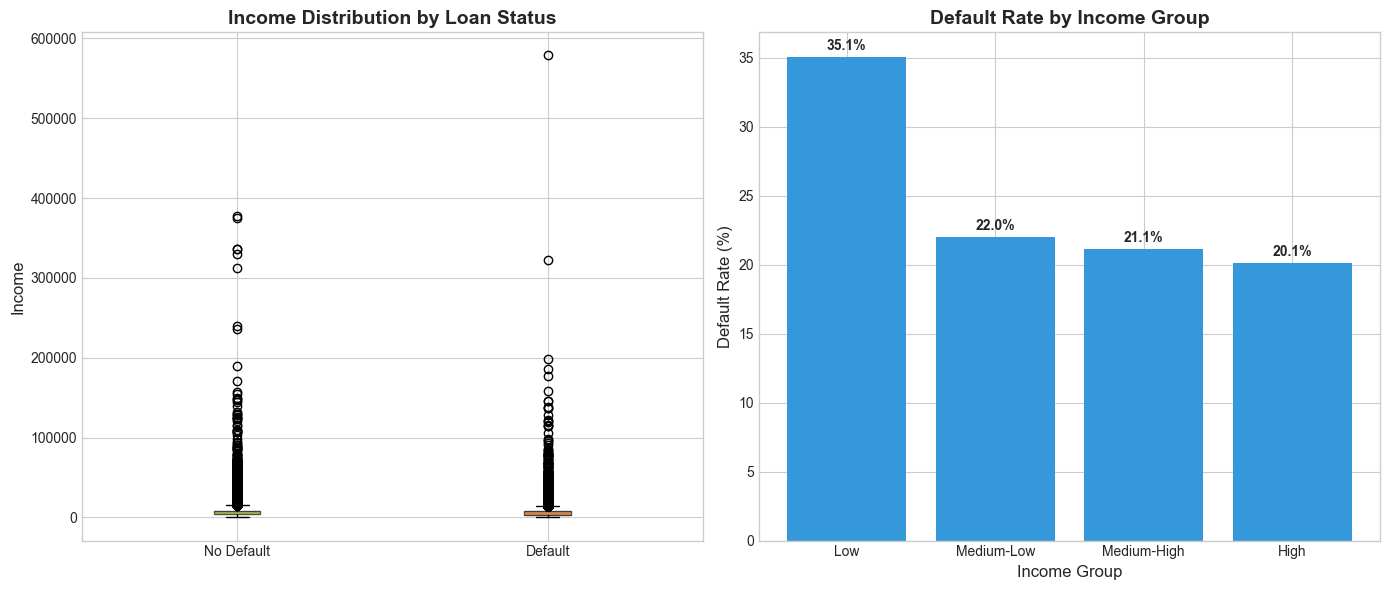

In [15]:
# Income vs Default analysis
if df_clean is not None and income_col and target_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Box plot
    colors_box = [COLORS[2], COLORS[1]]
    box = axes[0].boxplot([df_clean[df_clean[target_col] == 0][income_col],
                           df_clean[df_clean[target_col] == 1][income_col]],
                          labels=['No Default', 'Default'],
                          patch_artist=True)
    
    for patch, color in zip(box['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[0].set_ylabel('Income', fontsize=12)
    axes[0].set_title('Income Distribution by Loan Status', fontsize=14, fontweight='bold')
    
    # Default rate by income group
    if 'Income_Group' in df_clean.columns:
        income_default = df_clean.groupby('Income_Group')[target_col].mean() * 100
        income_order = ['Low', 'Medium-Low', 'Medium-High', 'High']
        income_default = income_default.reindex([g for g in income_order if g in income_default.index])
        
        bars = axes[1].bar(income_default.index, income_default.values, color=COLORS[0])
        axes[1].set_xlabel('Income Group', fontsize=12)
        axes[1].set_ylabel('Default Rate (%)', fontsize=12)
        axes[1].set_title('Default Rate by Income Group', fontsize=14, fontweight='bold')
        
        for bar, val in zip(bars, income_default.values):
            axes[1].text(bar.get_x() + bar.get_width()/2, val + 0.5, f'{val:.1f}%', 
                        ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '02_income_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.3 Loan Amount Analysis

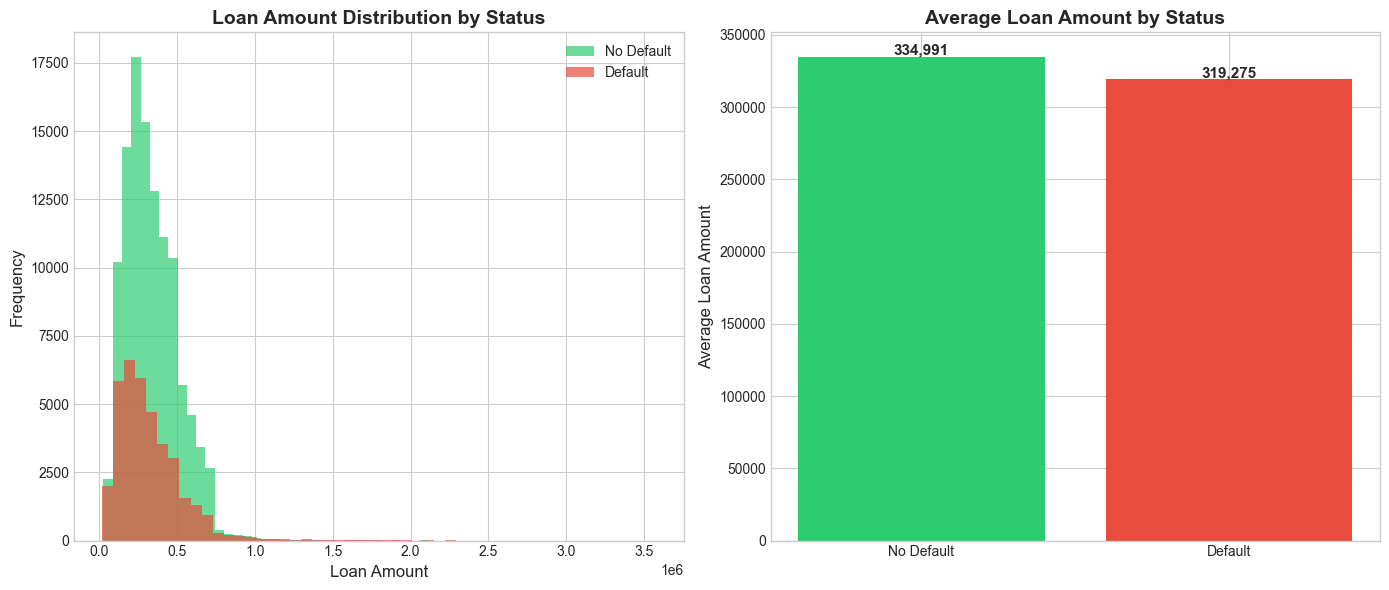

In [16]:
# Loan amount analysis
if df_clean is not None and loan_col and target_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Distribution
    df_no_default = df_clean[df_clean[target_col] == 0][loan_col]
    df_default = df_clean[df_clean[target_col] == 1][loan_col]
    
    axes[0].hist(df_no_default, bins=50, alpha=0.7, label='No Default', color=COLORS[2])
    axes[0].hist(df_default, bins=50, alpha=0.7, label='Default', color=COLORS[1])
    axes[0].set_xlabel('Loan Amount', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Loan Amount Distribution by Status', fontsize=14, fontweight='bold')
    axes[0].legend()
    
    # Average by status
    avg_by_status = df_clean.groupby(target_col)[loan_col].mean()
    labels = ['No Default', 'Default']
    colors = [COLORS[2], COLORS[1]]
    
    bars = axes[1].bar(labels, avg_by_status.values, color=colors)
    axes[1].set_ylabel('Average Loan Amount', fontsize=12)
    axes[1].set_title('Average Loan Amount by Status', fontsize=14, fontweight='bold')
    
    for bar, val in zip(bars, avg_by_status.values):
        axes[1].text(bar.get_x() + bar.get_width()/2, val + 1000, f'{val:,.0f}', 
                    ha='center', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '03_loan_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.4 Age Group Analysis

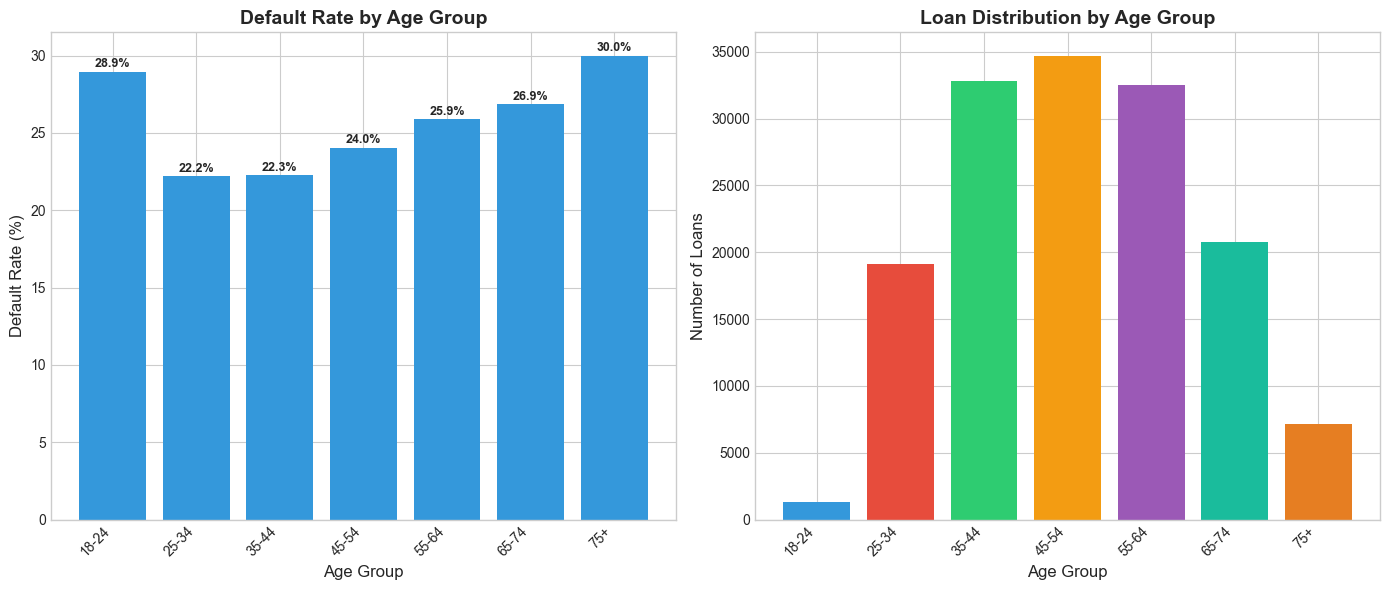

In [17]:
# Age group analysis (excluding Unknown)
if df_clean is not None and target_col and 'Age_Group' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Filter out Unknown (NaN) values for age analysis
    df_age = df_clean[df_clean['Age_Group'].notna()].copy()
    
    # Define age order
    age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
    
    # Default rate by age
    age_default = df_age.groupby('Age_Group')[target_col].mean() * 100
    age_default = age_default.reindex([a for a in age_order if a in age_default.index])
    
    bars = axes[0].bar(range(len(age_default)), age_default.values, color=COLORS[0])
    axes[0].set_xticks(range(len(age_default)))
    axes[0].set_xticklabels(age_default.index, rotation=45, ha='right')
    axes[0].set_xlabel('Age Group', fontsize=12)
    axes[0].set_ylabel('Default Rate (%)', fontsize=12)
    axes[0].set_title('Default Rate by Age Group', fontsize=14, fontweight='bold')
    
    for bar, val in zip(bars, age_default.values):
        axes[0].text(bar.get_x() + bar.get_width()/2, val + 0.3, f'{val:.1f}%', 
                    ha='center', fontsize=9, fontweight='bold')
    
    # Loan distribution by age
    age_count = df_age['Age_Group'].value_counts()
    age_count = age_count.reindex([a for a in age_order if a in age_count.index])
    colors_age = [COLORS[i % len(COLORS)] for i in range(len(age_count))]
    
    axes[1].bar(range(len(age_count)), age_count.values, color=colors_age)
    axes[1].set_xticks(range(len(age_count)))
    axes[1].set_xticklabels(age_count.index, rotation=45, ha='right')
    axes[1].set_xlabel('Age Group', fontsize=12)
    axes[1].set_ylabel('Number of Loans', fontsize=12)
    axes[1].set_title('Loan Distribution by Age Group', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '04_age_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.5 Credit and Interest Rate Analysis

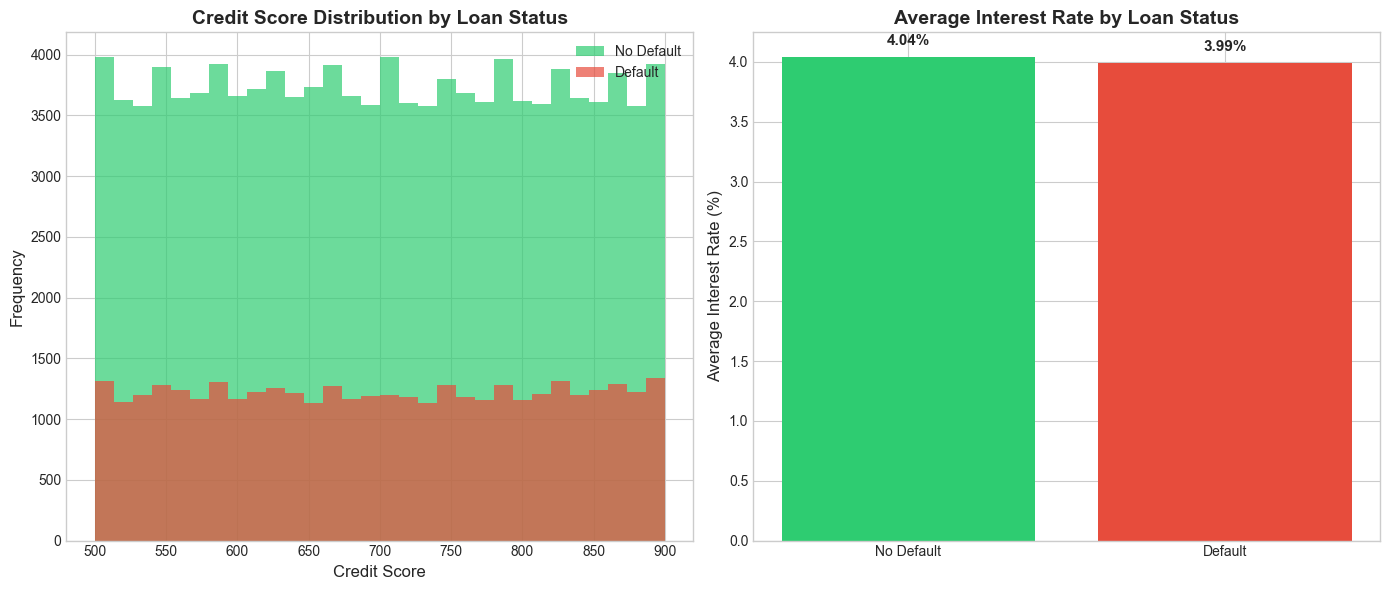

In [18]:
# Credit score and interest rate analysis
if df_clean is not None and target_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Find credit score column
    credit_cols = [c for c in df_clean.columns if 'credit' in c.lower() and 'score' in c.lower()]
    rate_cols = [c for c in df_clean.columns if 'rate' in c.lower() or 'interest' in c.lower()]
    
    if credit_cols:
        credit_col = credit_cols[0]
        df_no_default = df_clean[df_clean[target_col] == 0][credit_col].dropna()
        df_default = df_clean[df_clean[target_col] == 1][credit_col].dropna()
        
        axes[0].hist(df_no_default, bins=30, alpha=0.7, label='No Default', color=COLORS[2])
        axes[0].hist(df_default, bins=30, alpha=0.7, label='Default', color=COLORS[1])
        axes[0].set_xlabel('Credit Score', fontsize=12)
        axes[0].set_ylabel('Frequency', fontsize=12)
        axes[0].set_title('Credit Score Distribution by Loan Status', fontsize=14, fontweight='bold')
        axes[0].legend()
    else:
        axes[0].text(0.5, 0.5, 'Credit score data not available', ha='center', va='center', fontsize=12)
        axes[0].axis('off')
    
    if rate_cols:
        rate_col = rate_cols[0]
        rate_by_status = df_clean.groupby(target_col)[rate_col].mean()
        labels = ['No Default', 'Default']
        colors = [COLORS[2], COLORS[1]]
        
        bars = axes[1].bar(labels, rate_by_status.values, color=colors)
        axes[1].set_ylabel('Average Interest Rate (%)', fontsize=12)
        axes[1].set_title('Average Interest Rate by Loan Status', fontsize=14, fontweight='bold')
        
        for bar, val in zip(bars, rate_by_status.values):
            axes[1].text(bar.get_x() + bar.get_width()/2, val + 0.1, f'{val:.2f}%', 
                        ha='center', fontsize=11, fontweight='bold')
    else:
        axes[1].text(0.5, 0.5, 'Interest rate data not available', ha='center', va='center', fontsize=12)
        axes[1].axis('off')
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '05_credit_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.6 Correlation Analysis

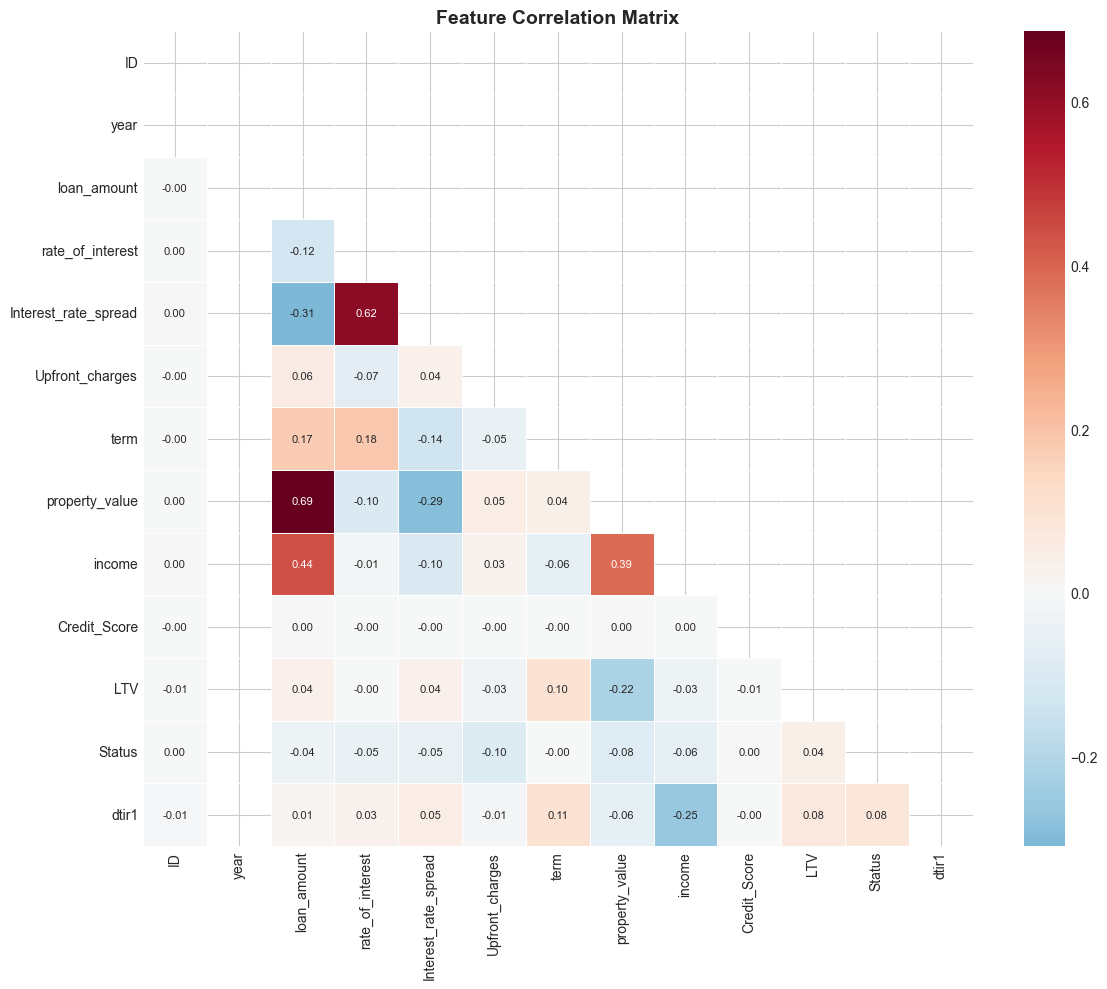

In [19]:
# Correlation matrix
if df_clean is not None and target_col:
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Select numeric columns
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    
    # Limit to top correlated features
    if len(numeric_cols) > 15:
        correlations = df_clean[numeric_cols].corr()[target_col].abs().sort_values(ascending=False)
        top_features = correlations.head(15).index.tolist()
        numeric_cols = top_features
    
    corr_matrix = df_clean[numeric_cols].corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                fmt='.2f', linewidths=0.5, ax=ax, annot_kws={'size': 8})
    
    ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '06_correlation_matrix.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

### 6.7 Employment and Property Analysis

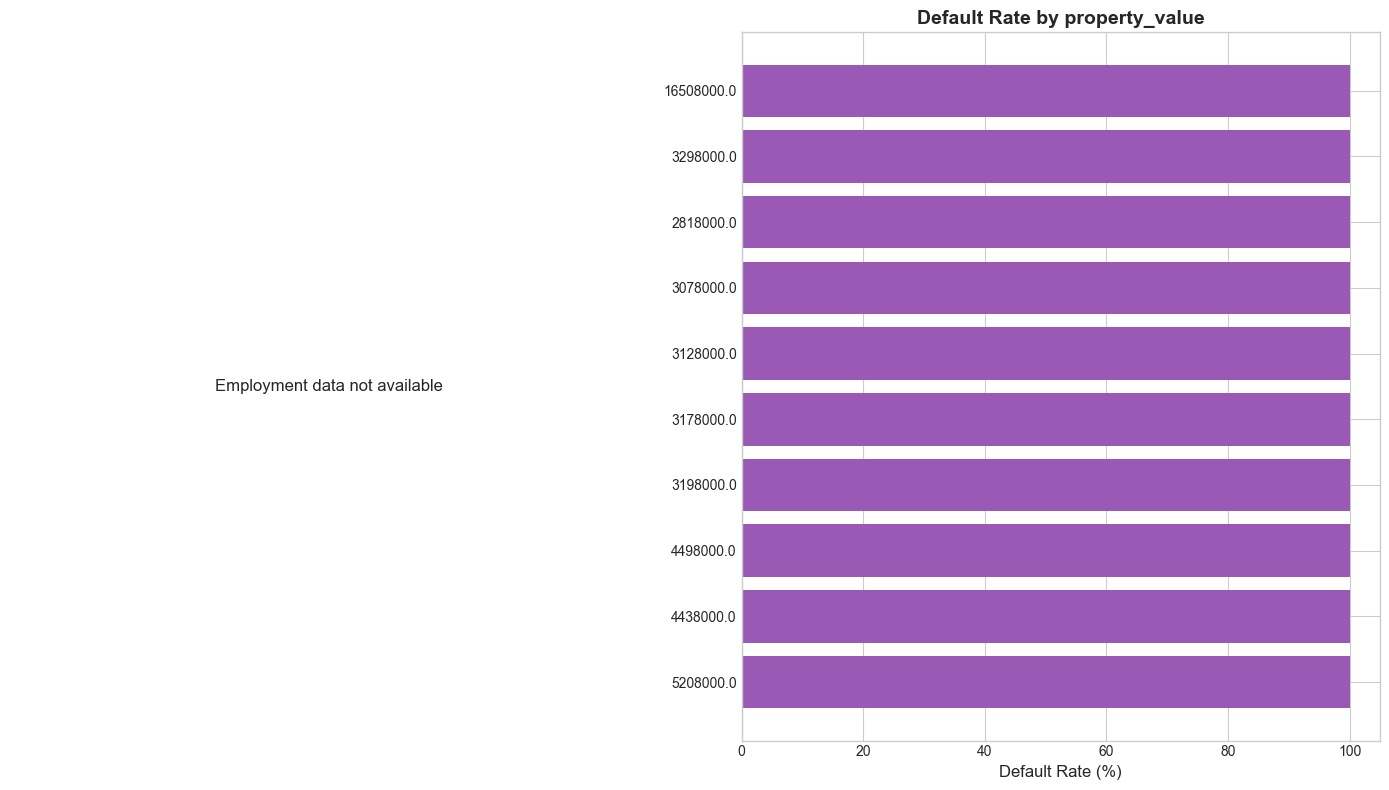

In [20]:
# Employment type analysis
if df_clean is not None and target_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 8))
    
    # Employment analysis
    emp_cols = [c for c in df_clean.columns if 'employ' in c.lower() or 'job' in c.lower() or 'occupation' in c.lower()]
    if emp_cols:
        emp_col = emp_cols[0]
        emp_default = df_clean.groupby(emp_col)[target_col].mean() * 100
        emp_default = emp_default.sort_values(ascending=True).tail(10)
        
        axes[0].barh(range(len(emp_default)), emp_default.values, color=COLORS[3])
        axes[0].set_yticks(range(len(emp_default)))
        axes[0].set_yticklabels(emp_default.index, fontsize=10)
        axes[0].set_xlabel('Default Rate (%)', fontsize=12)
        axes[0].set_title(f'Default Rate by Employment Type', fontsize=14, fontweight='bold')
    else:
        axes[0].text(0.5, 0.5, 'Employment data not available', ha='center', va='center', fontsize=12)
        axes[0].axis('off')
    
    # Region/Property analysis
    region_cols = [c for c in df_clean.columns if 'region' in c.lower() or 'state' in c.lower() or 'property' in c.lower()]
    if region_cols:
        region_col = region_cols[0]
        region_default = df_clean.groupby(region_col)[target_col].mean() * 100
        region_default = region_default.sort_values(ascending=True).tail(10)
        
        axes[1].barh(range(len(region_default)), region_default.values, color=COLORS[4])
        axes[1].set_yticks(range(len(region_default)))
        axes[1].set_yticklabels(region_default.index, fontsize=10)
        axes[1].set_xlabel('Default Rate (%)', fontsize=12)
        axes[1].set_title(f'Default Rate by {region_col}', fontsize=14, fontweight='bold')
    else:
        axes[1].text(0.5, 0.5, 'Region/Property data not available', ha='center', va='center', fontsize=12)
        axes[1].axis('off')
    
    plt.tight_layout()
    plt.savefig(VIZ_DIR / '07_employment_property_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

## 7. Export Data for Tableau

In [21]:
# Export main data (sampled for large datasets)
if df_clean is not None:
    # For export, keep Age_Group but replace NaN with 'Unknown' for Tableau
    df_export_full = df_clean.copy()
    df_export_full['Age_Group'] = df_export_full['Age_Group'].fillna('Unknown')
    
    if len(df_export_full) > 50000:
        df_export = df_export_full.sample(n=50000, random_state=42)
        print(f'Sampled data for Tableau: {len(df_export):,} rows')
    else:
        df_export = df_export_full
    
    df_export.to_csv(TABLEAU_DIR / 'loan_data_tableau.csv', index=False)
    print(f'Exported: loan_data_tableau.csv')

Sampled data for Tableau: 50,000 rows
Exported: loan_data_tableau.csv


In [22]:
# Export summary by income group
if df_clean is not None and target_col and 'Income_Group' in df_clean.columns:
    income_summary = df_clean.groupby('Income_Group').agg({
        target_col: ['count', 'sum', 'mean']
    }).round(4)
    income_summary.columns = ['Total_Loans', 'Defaults', 'Default_Rate']
    income_summary = income_summary.reset_index()
    income_summary.to_csv(TABLEAU_DIR / 'default_by_income.csv', index=False)
    print('Exported: default_by_income.csv')
    display(income_summary)

Exported: default_by_income.csv


,Income_Group,Total_Loans,Defaults,Default_Rate
0,High,36824,7417,0.2014
1,Low,37385,13118,0.3509
2,Medium-High,32068,6781,0.2115
3,Medium-Low,42393,9323,0.2199


In [23]:
# Export summary by age group (excluding Unknown)
if df_clean is not None and target_col and 'Age_Group' in df_clean.columns:
    # Filter out Unknown (NaN) values
    df_age = df_clean[df_clean['Age_Group'].notna()].copy()
    
    # Define age order
    age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
    
    age_summary = df_age.groupby('Age_Group').agg({
        target_col: ['count', 'sum', 'mean']
    }).round(4)
    age_summary.columns = ['Total_Loans', 'Defaults', 'Default_Rate']
    age_summary = age_summary.reset_index()
    
    # Sort by age order
    age_summary['Age_Group'] = pd.Categorical(age_summary['Age_Group'], categories=age_order, ordered=True)
    age_summary = age_summary.sort_values('Age_Group').reset_index(drop=True)
    
    age_summary.to_csv(TABLEAU_DIR / 'default_by_age.csv', index=False)
    print('Exported: default_by_age.csv')
    display(age_summary)

Exported: default_by_age.csv


,Age_Group,Total_Loans,Defaults,Default_Rate
0,18-24,1337,387,0.2895
1,25-34,19142,4248,0.2219
2,35-44,32818,7309,0.2227
3,45-54,34720,8349,0.2405
4,55-64,32534,8422,0.2589
5,65-74,20744,5571,0.2686
6,75+,7175,2153,0.3001


In [24]:
# Export overall summary
if df_clean is not None and target_col:
    overall_summary = pd.DataFrame({
        'Metric': ['Total Loans', 'Default Loans', 'Non-Default Loans', 'Default Rate (%)'],
        'Value': [
            len(df_clean),
            df_clean[target_col].sum(),
            len(df_clean) - df_clean[target_col].sum(),
            round(df_clean[target_col].mean() * 100, 2)
        ]
    })
    overall_summary.to_csv(TABLEAU_DIR / 'overall_summary.csv', index=False)
    print('Exported: overall_summary.csv')
    display(overall_summary)

Exported: overall_summary.csv


,Metric,Value
0,Total Loans,148670.00
1,Default Loans,36639.00
2,Non-Default Loans,112031.00
3,Default Rate (%),24.64


## 8. Key Findings

In [25]:
print('=' * 60)
print('KEY FINDINGS - BANK LOAN DEFAULT ANALYSIS')
print('=' * 60)

if df_clean is not None and target_col:
    default_rate = df_clean[target_col].mean() * 100
    total = len(df_clean)
    defaults = int(df_clean[target_col].sum())
    
    print(f'\n1. OVERALL DEFAULT RATE')
    print(f'   - Total loans analyzed: {total:,}')
    print(f'   - Default rate: {default_rate:.2f}%')
    print(f'   - Number of defaults: {defaults:,}')
    
    if 'Income_Group' in df_clean.columns:
        income_default = df_clean.groupby('Income_Group')[target_col].mean() * 100
        highest_income = income_default.idxmax()
        lowest_income = income_default.idxmin()
        
        print(f'\n2. INCOME IMPACT')
        print(f'   - Highest default rate: {highest_income} income ({income_default[highest_income]:.2f}%)')
        print(f'   - Lowest default rate: {lowest_income} income ({income_default[lowest_income]:.2f}%)')
    
    if 'Age_Group' in df_clean.columns:
        # Filter out Unknown (NaN) values for age analysis
        df_age = df_clean[df_clean['Age_Group'].notna()]
        age_default = df_age.groupby('Age_Group')[target_col].mean() * 100
        if len(age_default) > 0:
            highest_age = age_default.idxmax()
            lowest_age = age_default.idxmin()
            print(f'\n3. AGE IMPACT')
            print(f'   - Highest risk age group: {highest_age} ({age_default[highest_age]:.2f}%)')
            print(f'   - Lowest risk age group: {lowest_age} ({age_default[lowest_age]:.2f}%)')
    
    if loan_col:
        avg_loan_default = df_clean[df_clean[target_col] == 1][loan_col].mean()
        avg_loan_non_default = df_clean[df_clean[target_col] == 0][loan_col].mean()
        
        print(f'\n4. LOAN AMOUNT COMPARISON')
        print(f'   - Avg loan (defaulted): {avg_loan_default:,.0f}')
        print(f'   - Avg loan (non-defaulted): {avg_loan_non_default:,.0f}')

print('\n' + '=' * 60)

KEY FINDINGS - BANK LOAN DEFAULT ANALYSIS

1. OVERALL DEFAULT RATE
   - Total loans analyzed: 148,670
   - Default rate: 24.64%
   - Number of defaults: 36,639

2. INCOME IMPACT
   - Highest default rate: Low income (35.09%)
   - Lowest default rate: High income (20.14%)

3. AGE IMPACT
   - Highest risk age group: 75+ (30.01%)
   - Lowest risk age group: 25-34 (22.19%)

4. LOAN AMOUNT COMPARISON
   - Avg loan (defaulted): 319,275
   - Avg loan (non-defaulted): 334,991



## 9. Recommendations

In [26]:
print('RECOMMENDATIONS')
print('-' * 40)
print('''
Based on the analysis, the following recommendations are suggested:

1. INCOME-BASED RISK ASSESSMENT
   - Apply stricter verification for low-income applicants
   - Consider debt-to-income ratios in approval decisions

2. AGE-BASED RISK PROFILING
   - Younger borrowers may need additional support
   - Consider employment stability for different age groups

3. LOAN AMOUNT CONSIDERATIONS
   - Review loan-to-value ratios
   - Match loan amounts to repayment capacity

4. CREDIT MONITORING
   - Regular credit score tracking
   - Early warning system for high-risk accounts

5. DATA-DRIVEN DECISIONS
   - Use predictive models for risk scoring
   - Continuous monitoring and model updates
''')

RECOMMENDATIONS
----------------------------------------

Based on the analysis, the following recommendations are suggested:

1. INCOME-BASED RISK ASSESSMENT
   - Apply stricter verification for low-income applicants
   - Consider debt-to-income ratios in approval decisions

2. AGE-BASED RISK PROFILING
   - Younger borrowers may need additional support
   - Consider employment stability for different age groups

3. LOAN AMOUNT CONSIDERATIONS
   - Review loan-to-value ratios
   - Match loan amounts to repayment capacity

4. CREDIT MONITORING
   - Regular credit score tracking
   - Early warning system for high-risk accounts

5. DATA-DRIVEN DECISIONS
   - Use predictive models for risk scoring
   - Continuous monitoring and model updates



## 10. Summary

In [27]:
print('=' * 60)
print('ANALYSIS SUMMARY')
print('=' * 60)
print('''
This analysis examined bank loan default patterns using
borrower and loan data from Kaggle.

Key aspects covered:
- Overall default rate analysis
- Income impact on default risk
- Age group analysis
- Loan amount patterns
- Credit and financial behavior
- Feature correlations

Outputs generated:
- 7 visualizations (PNG files)
- 4 data exports for Tableau dashboards

Data Source: https://www.kaggle.com/datasets/yasserh/loan-default-dataset
''')
print('=' * 60)
print('\nAnalysis completed by: Ishak Islam')
print('Internship ID: UMID28072552431')
print('Program: Unified Mentor Internship')
print('=' * 60)

ANALYSIS SUMMARY

This analysis examined bank loan default patterns using
borrower and loan data from Kaggle.

Key aspects covered:
- Overall default rate analysis
- Income impact on default risk
- Age group analysis
- Loan amount patterns
- Credit and financial behavior
- Feature correlations

Outputs generated:
- 7 visualizations (PNG files)
- 4 data exports for Tableau dashboards

Data Source: https://www.kaggle.com/datasets/yasserh/loan-default-dataset


Analysis completed by: Ishak Islam
Internship ID: UMID28072552431
Program: Unified Mentor Internship
